In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

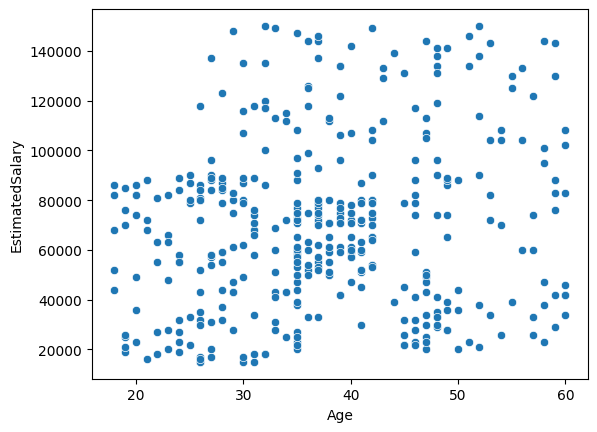

In [6]:
import seaborn as sns

sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [7]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 48ms/step - loss: 3522.1851 - accuracy: 0.6531 - val_loss: 1502.4607 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 888.5098 - accuracy: 0.4469 - val_loss: 812.2664 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 393.1971 - accuracy: 0.5344 - val_loss: 624.5682 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 350.4385 - accuracy: 0.5281 - val_loss: 261.2528 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 116.8364 - accuracy: 0.5531 - val_loss: 108.3670 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 75.3659 - accuracy: 0.4344 - val_loss: 98.7628 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 78.8132 - accuracy: 0.5406 - val_loss: 114.2984 - val_ac

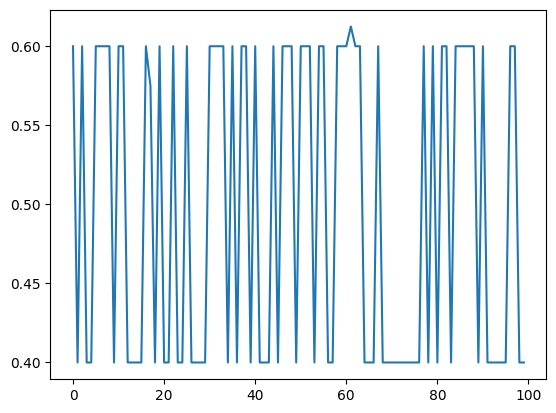

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

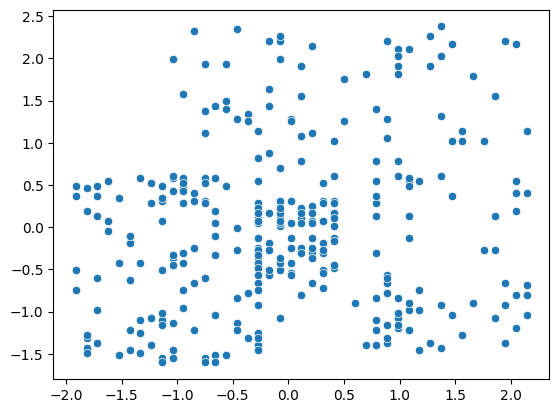

In [21]:
sns.scatterplot(x=x_train_scaled[:,0],y=x_train_scaled[:,1])

In [22]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 0.6396 - accuracy: 0.7875 - val_loss: 0.6021 - val_accuracy: 0.7875
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5873 - accuracy: 0.8062 - val_loss: 0.5498 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5425 - accuracy: 0.8188 - val_loss: 0.5052 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5022 - accuracy: 0.8281 - val_loss: 0.4700 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4700 - accuracy: 0.8344 - val_loss: 0.4383 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4424 - accuracy: 0.8375 - val_loss: 0.4122 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4180 - accuracy: 0.8469 - val_loss: 0.3908 - val_accuracy: 0.8000
Epoch 8/100

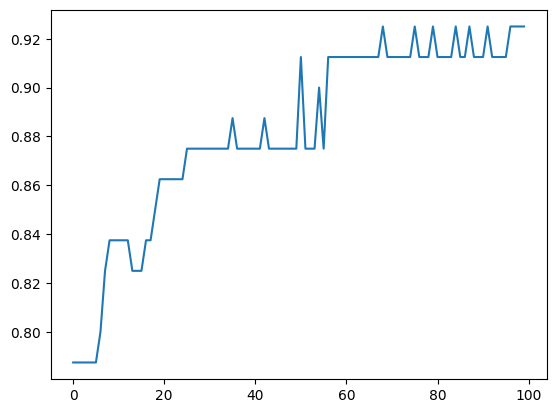

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])